# Data Engineering - Filter interesting data

## Import librairies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read the dataset

In [3]:
df = pd.read_csv('survey_results_public.csv')
print(len(df))
df.head()

73268


,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


## Filter the column for the dataset of the first page

The input columns will be used as a filter. These are the columns to keep :

- YearsCodePro (Years of coding as a pro)
- EdLevel (Education level)
- Devtype (Development type)
- Country
- OrgSize (Organization Size)

The output columns to keep are :

- CompTotal (Total Salary)
- CompFreq (Annual or mensual salary)

These two columns can be broadcaster into one, for instance converting everything into an annual salary.

Additionnally, the following columns have to be filtered :

The MainBranch column will have to be filtered to only keep the line containing "I am a developer by profession".



In [4]:
# Filter the data to only keep profesionnal developers
print(len(df))
df_filtered = df[df['MainBranch'].str.contains("I am a developer by profession")]
print(len(df_filtered))

# Also filter to only keep American developers
df_filtered = df_filtered[df_filtered['Country'].str.contains("America")]

selectedInput = [
    'EdLevel',
    'DevType',
    'OrgSize',
    'Country',
    'YearsCodePro'
]
selectedOutput = [
    'CompTotal',
    'CompFreq'
]

df_features = df_filtered[selectedInput + selectedOutput]
# Remove row that have NaN salary
df_features = df_features[df_features['CompTotal'].notna()]
df_features = df_features[df_features['CompFreq'].notna()]

# Convert monthly salary to yearly, then drop the CompTotal and CompFreq columns
df_features['YearlySalary'] = df_features.apply(lambda row: float(row['CompTotal']) * 12 if row['CompFreq'] == "Monthly" else row['CompTotal'], axis=1)
df_features = df_features.drop(['CompTotal', 'CompFreq'] , axis=1)

# Filter outliers
min_yearly_salary = 0
max_yearly_salary = 1e7
df_features = df_features.loc[df_features['YearlySalary'] > min_yearly_salary]
df_features = df_features.loc[df_features['YearlySalary'] < max_yearly_salary]

print(len(df_features))

df_features

73268
53507
7952


,EdLevel,DevType,OrgSize,Country,YearsCodePro,YearlySalary
12,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack",2 to 9 employees,United States of America,5,65000.0
14,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Developer, full-stack;Academic researcher;DevO...","5,000 to 9,999 employees",United States of America,5,110000.0
26,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack;Developer, back-end",20 to 99 employees,United States of America,5,106960.0
28,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Developer, desktop or enterprise applications;...","10,000 or more employees",United States of America,14,130000.0
31,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack","10,000 or more employees",United States of America,21,102000.0
...,...,...,...,...,...,...
73222,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack;Developer, back-end","5,000 to 9,999 employees",United States of America,11,300000.0
73223,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, back-end",100 to 499 employees,United States of America,12,200000.0
73226,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack;DevOps specialist","1,000 to 4,999 employees",United States of America,16,130000.0
73229,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Data scientist or machine learning specialist;...,500 to 999 employees,United States of America,15,325000.0


In [5]:
df_features['DevType'] = df_features['DevType'].str.split(';')
df_features = df_features.explode(['DevType'])
df_features

,EdLevel,DevType,OrgSize,Country,YearsCodePro,YearlySalary
12,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack",2 to 9 employees,United States of America,5,65000.0
14,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Developer, full-stack","5,000 to 9,999 employees",United States of America,5,110000.0
14,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Academic researcher,"5,000 to 9,999 employees",United States of America,5,110000.0
14,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",DevOps specialist,"5,000 to 9,999 employees",United States of America,5,110000.0
26,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack",20 to 99 employees,United States of America,5,106960.0
...,...,...,...,...,...,...
73229,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Data scientist or machine learning specialist,500 to 999 employees,United States of America,15,325000.0
73229,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Developer, back-end",500 to 999 employees,United States of America,15,325000.0
73229,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Project manager,500 to 999 employees,United States of America,15,325000.0
73229,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Data or business analyst,500 to 999 employees,United States of America,15,325000.0


<AxesSubplot: xlabel='YearlySalary', ylabel='DevType'>

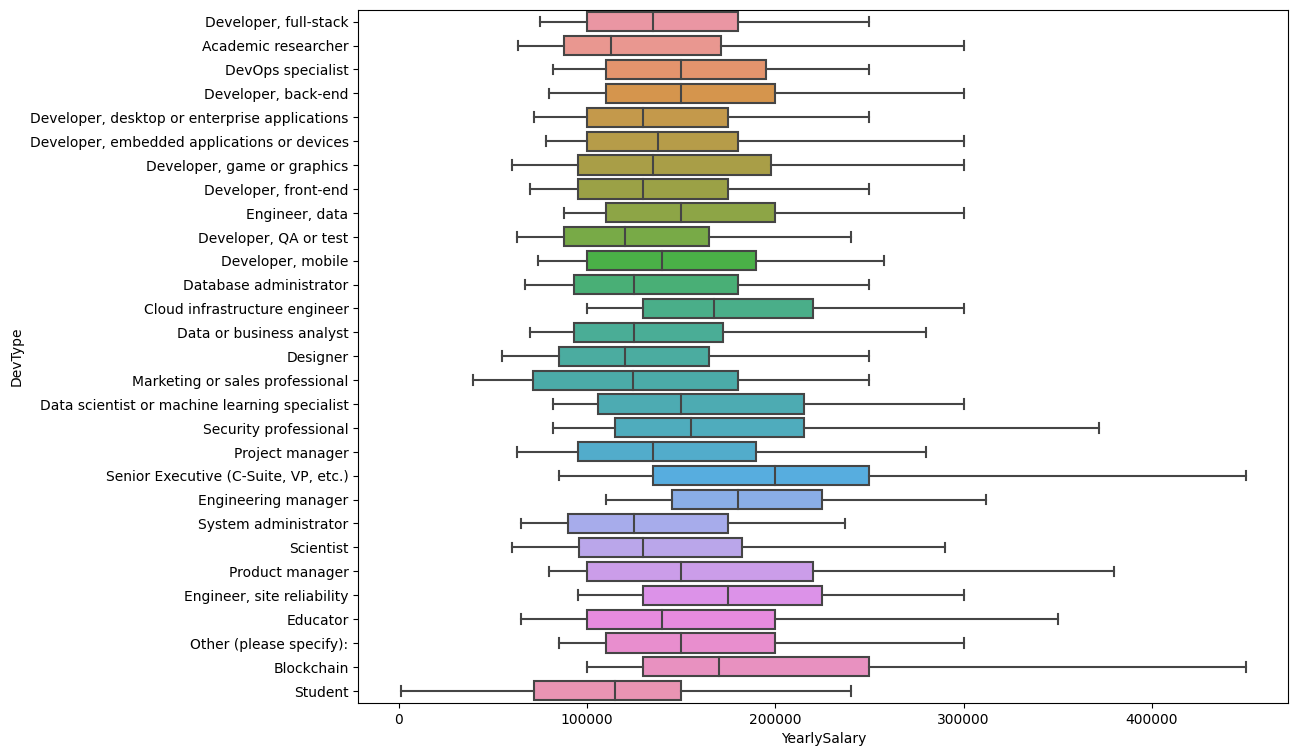

In [6]:
plt.figure(figsize=(12, 9))
sns.boxplot(x='YearlySalary', y='DevType', data=df_features, showfliers=False, orient="h", whis=[10, 90])

In [7]:
# Get unique strings in the DevType column (especially useful for creating the dropmenu)
df_features['DevType'].str.split(';').explode().unique().tolist()

['Developer, full-stack',
 'Academic researcher',
 'DevOps specialist',
 'Developer, back-end',
 'Developer, desktop or enterprise applications',
 'Developer, embedded applications or devices',
 'Developer, game or graphics',
 'Developer, front-end',
 'Engineer, data',
 'Developer, QA or test',
 'Developer, mobile',
 'Database administrator',
 'Cloud infrastructure engineer',
 'Data or business analyst',
 'Designer',
 'Marketing or sales professional',
 'Data scientist or machine learning specialist',
 'Security professional',
 'Project manager',
 'Senior Executive (C-Suite, VP, etc.)',
 'Engineering manager',
 'System administrator',
 'Scientist',
 'Product manager',
 'Engineer, site reliability',
 'Educator',
 'Other (please specify):',
 'Blockchain',
 'Student',
 nan]

C:\Users\Antony\AppData\Local\Temp\ipykernel_5476\1518391286.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ds_years = df_ds.groupby(['YearsCodePro']).mean()


<AxesSubplot: xlabel='YearsCodePro'>

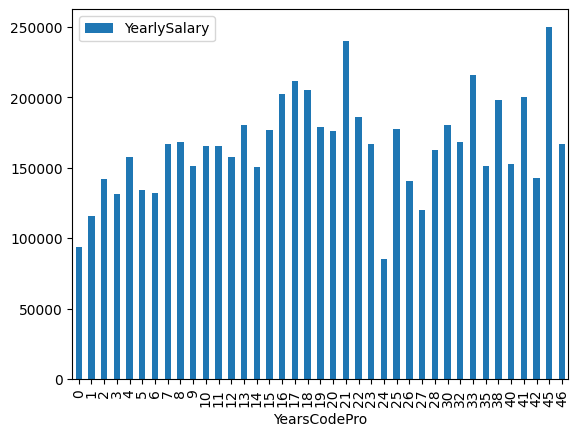

In [48]:
# Display the histogram for the Data Scientists
df_features['DevType'] = df_features['DevType'].fillna("")
df_ds = df_features[df_features['DevType'].str.contains("Data scientist")]
df_ds

# Filter the salary to remove the outliers
df_ds = df_ds.loc[df_ds['YearlySalary'] > df_ds.YearlySalary.quantile(0.1)]
df_ds = df_ds.loc[df_ds['YearlySalary'] < df_ds.YearlySalary.quantile(0.9)]

df_ds_years = df_ds.groupby(['YearsCodePro']).mean()
df_ds_years = df_ds_years.rename(index={'Less than 1 year':'0'})
df_ds_years.index = pd.to_numeric(df_ds_years.index)
df_ds_years = df_ds_years.sort_index()

df_ds_years.plot.bar()